Name: Zhuoyou Shen

ID: 2035073656

GitHub Username: zhuoyous

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from skmultilearn.problem_transform import LabelPowerset
from sklearn.tree import plot_tree
from sklearn.tree import _tree, DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold,GridSearchCV
from sklearn import linear_model
import xgboost as xgb

1.

In [2]:
df = pd.read_csv('../data/diagnosis.csv', encoding='utf-16', sep='\t', decimal=',', header=None)

In [3]:
df

,0,1,2,3,4,5,6,7
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,no,yes
116,41.5,no,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,no,yes
118,41.5,no,yes,yes,no,yes,no,yes


In [4]:
df.columns = ['temp', 'nausea', 'lumber_pain', 'urine_pushing', 'micturiation_pain', 
                  'burning', 'label1_inflammation', 'label2_nephritis']

In [5]:
df

,temp,nausea,lumber_pain,urine_pushing,micturiation_pain,burning,label1_inflammation,label2_nephritis
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,no,yes
116,41.5,no,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,no,yes
118,41.5,no,yes,yes,no,yes,no,yes


In [6]:
for i in df.columns[1:]:
    df.loc[:, i] =  df.loc[:, i].map(lambda x : 1.0 if x == 'yes' else 0.0)

In [7]:
df

,temp,nausea,lumber_pain,urine_pushing,micturiation_pain,burning,label1_inflammation,label2_nephritis
0,35.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,35.9,0.0,0.0,1.0,1.0,1.0,1.0,0.0
2,35.9,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,36.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
4,36.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
115,41.4,0.0,1.0,1.0,0.0,1.0,0.0,1.0
116,41.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,41.5,1.0,1.0,0.0,1.0,0.0,0.0,1.0
118,41.5,0.0,1.0,1.0,0.0,1.0,0.0,1.0


In [8]:
feature = df.loc[:,df.columns[:-2]]
label = df.loc[:, df.columns[-2:]]

In [9]:
feature

,temp,nausea,lumber_pain,urine_pushing,micturiation_pain,burning
0,35.5,0.0,1.0,0.0,0.0,0.0
1,35.9,0.0,0.0,1.0,1.0,1.0
2,35.9,0.0,1.0,0.0,0.0,0.0
3,36.0,0.0,0.0,1.0,1.0,1.0
4,36.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
115,41.4,0.0,1.0,1.0,0.0,1.0
116,41.5,0.0,0.0,0.0,0.0,0.0
117,41.5,1.0,1.0,0.0,1.0,0.0
118,41.5,0.0,1.0,1.0,0.0,1.0


In [10]:
label

,label1_inflammation,label2_nephritis
0,0.0,0.0
1,1.0,0.0
2,0.0,0.0
3,1.0,0.0
4,0.0,0.0
...,...,...
115,0.0,1.0
116,0.0,0.0
117,0.0,1.0
118,0.0,1.0


(b)

[Text(0.4, 0.9, 'X[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2, 0.7, 'X[3] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.6, 0.7, 'X[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'X[1] <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8, 0.3, 'X[3] <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

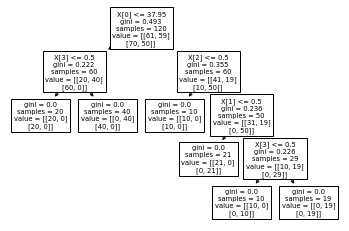

In [11]:
dr = tree.DecisionTreeClassifier()
dr.fit(feature,label)
plot_tree(dr)

Binary Relevance

In [12]:
df

,temp,nausea,lumber_pain,urine_pushing,micturiation_pain,burning,label1_inflammation,label2_nephritis
0,35.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,35.9,0.0,0.0,1.0,1.0,1.0,1.0,0.0
2,35.9,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,36.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
4,36.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
115,41.4,0.0,1.0,1.0,0.0,1.0,0.0,1.0
116,41.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,41.5,1.0,1.0,0.0,1.0,0.0,0.0,1.0
118,41.5,0.0,1.0,1.0,0.0,1.0,0.0,1.0


In [13]:
BR1 = df.drop(columns = 'label2_nephritis')
BR1

,temp,nausea,lumber_pain,urine_pushing,micturiation_pain,burning,label1_inflammation
0,35.5,0.0,1.0,0.0,0.0,0.0,0.0
1,35.9,0.0,0.0,1.0,1.0,1.0,1.0
2,35.9,0.0,1.0,0.0,0.0,0.0,0.0
3,36.0,0.0,0.0,1.0,1.0,1.0,1.0
4,36.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
115,41.4,0.0,1.0,1.0,0.0,1.0,0.0
116,41.5,0.0,0.0,0.0,0.0,0.0,0.0
117,41.5,1.0,1.0,0.0,1.0,0.0,0.0
118,41.5,0.0,1.0,1.0,0.0,1.0,0.0


In [14]:
BR1_feature = BR1.iloc[:,:-1]
BR1_label = BR1['label1_inflammation']

[Text(0.4, 0.875, 'X[3] <= 0.5\ngini = 0.5\nsamples = 120\nvalue = [61, 59]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0]'),
 Text(0.6, 0.625, 'X[4] <= 0.5\ngini = 0.387\nsamples = 80\nvalue = [21, 59]'),
 Text(0.4, 0.375, 'X[0] <= 37.95\ngini = 0.437\nsamples = 31\nvalue = [21, 10]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 49\nvalue = [0, 49]')]

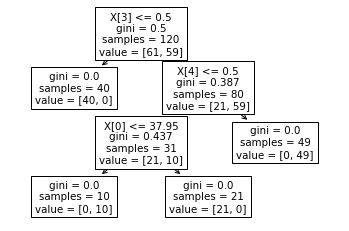

In [15]:
dr1 = tree.DecisionTreeClassifier()
dr1.fit(BR1_feature,BR1_label)
plot_tree(dr1)

In [16]:
BR2 = df.drop(columns = 'label1_inflammation')
BR2

,temp,nausea,lumber_pain,urine_pushing,micturiation_pain,burning,label2_nephritis
0,35.5,0.0,1.0,0.0,0.0,0.0,0.0
1,35.9,0.0,0.0,1.0,1.0,1.0,0.0
2,35.9,0.0,1.0,0.0,0.0,0.0,0.0
3,36.0,0.0,0.0,1.0,1.0,1.0,0.0
4,36.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
115,41.4,0.0,1.0,1.0,0.0,1.0,1.0
116,41.5,0.0,0.0,0.0,0.0,0.0,0.0
117,41.5,1.0,1.0,0.0,1.0,0.0,1.0
118,41.5,0.0,1.0,1.0,0.0,1.0,1.0


In [17]:
BR2_feature = BR2.iloc[:,:-1]
BR2_label = BR2['label2_nephritis']

[Text(0.4, 0.8333333333333334, 'X[0] <= 37.95\ngini = 0.486\nsamples = 120\nvalue = [70, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 60\nvalue = [60, 0]'),
 Text(0.6, 0.5, 'X[2] <= 0.5\ngini = 0.278\nsamples = 60\nvalue = [10, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 50\nvalue = [0, 50]')]

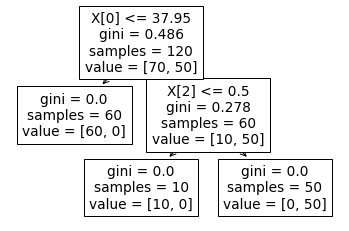

In [18]:
dr2 = tree.DecisionTreeClassifier()
dr2.fit(BR2_feature,BR2_label)
plot_tree(dr2)

(c)

In [19]:
def tree_to_code(tree, feature_names):


    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [20]:
tree_to_code(dr,list(feature))

def tree(temp, nausea, lumber_pain, urine_pushing, micturiation_pain, burning):
  if temp <= 37.95000076293945:
    if urine_pushing <= 0.5:
      return [[20.  0.]
 [20.  0.]]
    else:  # if urine_pushing > 0.5
      return [[ 0. 40.]
 [40.  0.]]
  else:  # if temp > 37.95000076293945
    if lumber_pain <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if lumber_pain > 0.5
      if nausea <= 0.5:
        return [[21.  0.]
 [ 0. 21.]]
      else:  # if nausea > 0.5
        if urine_pushing <= 0.5:
          return [[10.  0.]
 [ 0. 10.]]
        else:  # if urine_pushing > 0.5
          return [[ 0. 19.]
 [ 0. 19.]]


In [21]:
tree_to_code(dr1,list(BR1_feature))

def tree(temp, nausea, lumber_pain, urine_pushing, micturiation_pain, burning):
  if urine_pushing <= 0.5:
    return [[40.  0.]]
  else:  # if urine_pushing > 0.5
    if micturiation_pain <= 0.5:
      if temp <= 37.95000076293945:
        return [[ 0. 10.]]
      else:  # if temp > 37.95000076293945
        return [[21.  0.]]
    else:  # if micturiation_pain > 0.5
      return [[ 0. 49.]]


In [22]:
tree_to_code(dr2,list(BR2_feature))

def tree(temp, nausea, lumber_pain, urine_pushing, micturiation_pain, burning):
  if temp <= 37.95000076293945:
    return [[60.  0.]]
  else:  # if temp > 37.95000076293945
    if lumber_pain <= 0.5:
      return [[10.  0.]]
    else:  # if lumber_pain > 0.5
      return [[ 0. 50.]]


(d)

In [23]:
dr = DecisionTreeClassifier()
dr.fit(feature,label)
para = {'criterion':['gini','entropy'],
    'max_depth':range(1,10),
        'min_samples_split':range(1,10),
            'min_samples_leaf':range(1,10)}
grid = GridSearchCV(dr,param_grid = para)
grid.fit(feature,label)
grid.best_params_

C:\Users\49181\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
810 fits failed out of a total of 7290.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
810 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\49181\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\49181\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "C:\Users\49181\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    check_scalar(
  File "C:\Users\49181\anaconda3\lib\site-packages\sklearn\utils\validation.py", 

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [24]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=4)

In [25]:
grid.best_score_

0.95

In [26]:
path = dr.cost_complexity_pruning_path(feature, label)
path

{'ccp_alphas': array([0.        , 0.04908333, 0.07947222, 0.11111111, 0.20423611]),
 'impurities': array([0.        , 0.09816667, 0.17763889, 0.28875   , 0.49298611])}

2.

(a)

In [27]:
commu_data = pd.read_csv('../data/communities.csv',header = None,na_values=['?'])
with open('../data/name.txt') as f:
    contents = f.read().splitlines()

In [28]:
commu_data.columns = contents
commu_data

,state,county,community,communityname string,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9.0,80070.0,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,25,17.0,72600.0,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


In [29]:
commu_data.drop(['state','county','community','communityname string','fold'], axis=1,inplace = True)

In [30]:
commu_data

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


(b)

In [31]:
commu_data.fillna(commu_data.mean(),inplace = True)

In [32]:
train_data = commu_data.iloc[:1495,]
test_data = commu_data.iloc[1495:,]

In [33]:
train_data

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.02,0.14,0.22,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.07,0.40,0.14,0.070000,0.050000,0.850000,0.500000,0.61,0.190000,0.20
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.03,0.12,0.01,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.30
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.08,0.15,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03


In [34]:
test_data

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
1495,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.01,0.23,0.73,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
1496,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.01,0.18,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.11
1497,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.01,0.18,0.00,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
1498,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.06,0.13,0.16,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.06
1499,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.03,0.23,0.06,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.080000,0.060000,0.780000,0.000000,0.91,0.280000,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.020000,0.020000,0.790000,0.000000,0.22,0.180000,0.19


(c)

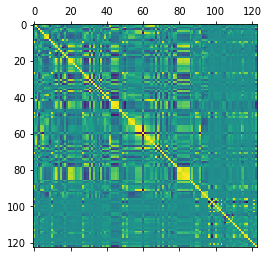

In [35]:
plt.matshow(commu_data.corr())

(d)

In [36]:
cv = pd.DataFrame(commu_data.std()/commu_data.mean(),columns = ['cv'])
cv

,cv
population,2.203503
householdsize,0.353298
racepctblack,1.410920
racePctWhite,0.323782
racePctAsian,1.359162
...,...
LemasPctPolicOnPatr,0.122331
LemasGangUnitDeploy,0.368040
LemasPctOfficDrugUn,2.555266
PolicBudgPerPop,0.337281


(e)

In [37]:
cv = cv.sort_values('cv',ascending = False)
cv

,cv
NumStreet,4.407702
NumInShelters,3.485481
NumIlleg,2.994196
NumImmig,2.900497
LemasPctOfficDrugUn,2.555266
...,...
NumKindsDrugsSeiz,0.145956
RacialMatchCommPol,0.131417
LemasPctPolicOnPatr,0.122331
PctPolicWhite,0.121659


In [38]:
cv.head(11)

,cv
NumStreet,4.407702
NumInShelters,3.485481
NumIlleg,2.994196
NumImmig,2.900497
LemasPctOfficDrugUn,2.555266
NumUnderPov,2.304970
population,2.203503
numbUrban,2.001744
HousVacant,1.958780
LandArea,1.678031


In [39]:
new_df = pd.DataFrame()
s1 = pd.Series(commu_data['NumStreet'])
s2 = pd.Series(commu_data['NumInShelters'])
s3 = pd.Series(commu_data['NumIlleg'])
s4 = pd.Series(commu_data['NumImmig'])
s5 = pd.Series(commu_data['LemasPctOfficDrugUn'])
s6 = pd.Series(commu_data['NumUnderPov'])
s7 = pd.Series(commu_data['population'])
s8 = pd.Series(commu_data['numbUrban'])
s9 = pd.Series(commu_data['HousVacant'])
s10 = pd.Series(commu_data['LandArea'])
s11 = pd.Series(commu_data['racePctHisp'])


new_df = pd.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11],axis = 1)
new_df

,NumStreet,NumInShelters,NumIlleg,NumImmig,LemasPctOfficDrugUn,NumUnderPov,population,numbUrban,HousVacant,LandArea,racePctHisp
0,0.00,0.04,0.04,0.03,0.32,0.08,0.19,0.20,0.21,0.12,0.17
1,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.02,0.02,0.02,0.07
2,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.04
3,0.00,0.00,0.03,0.02,0.00,0.01,0.04,0.06,0.01,0.02,0.10
4,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.01,0.04,0.05
...,...,...,...,...,...,...,...,...,...,...,...
1989,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.03,0.02,0.01,0.16
1990,0.00,0.01,0.03,0.05,0.00,0.04,0.05,0.06,0.03,0.02,0.32
1991,0.02,0.06,0.13,0.06,0.91,0.12,0.16,0.17,0.21,0.08,0.25
1992,0.01,0.04,0.02,0.06,0.22,0.03,0.08,0.09,0.05,0.03,0.10


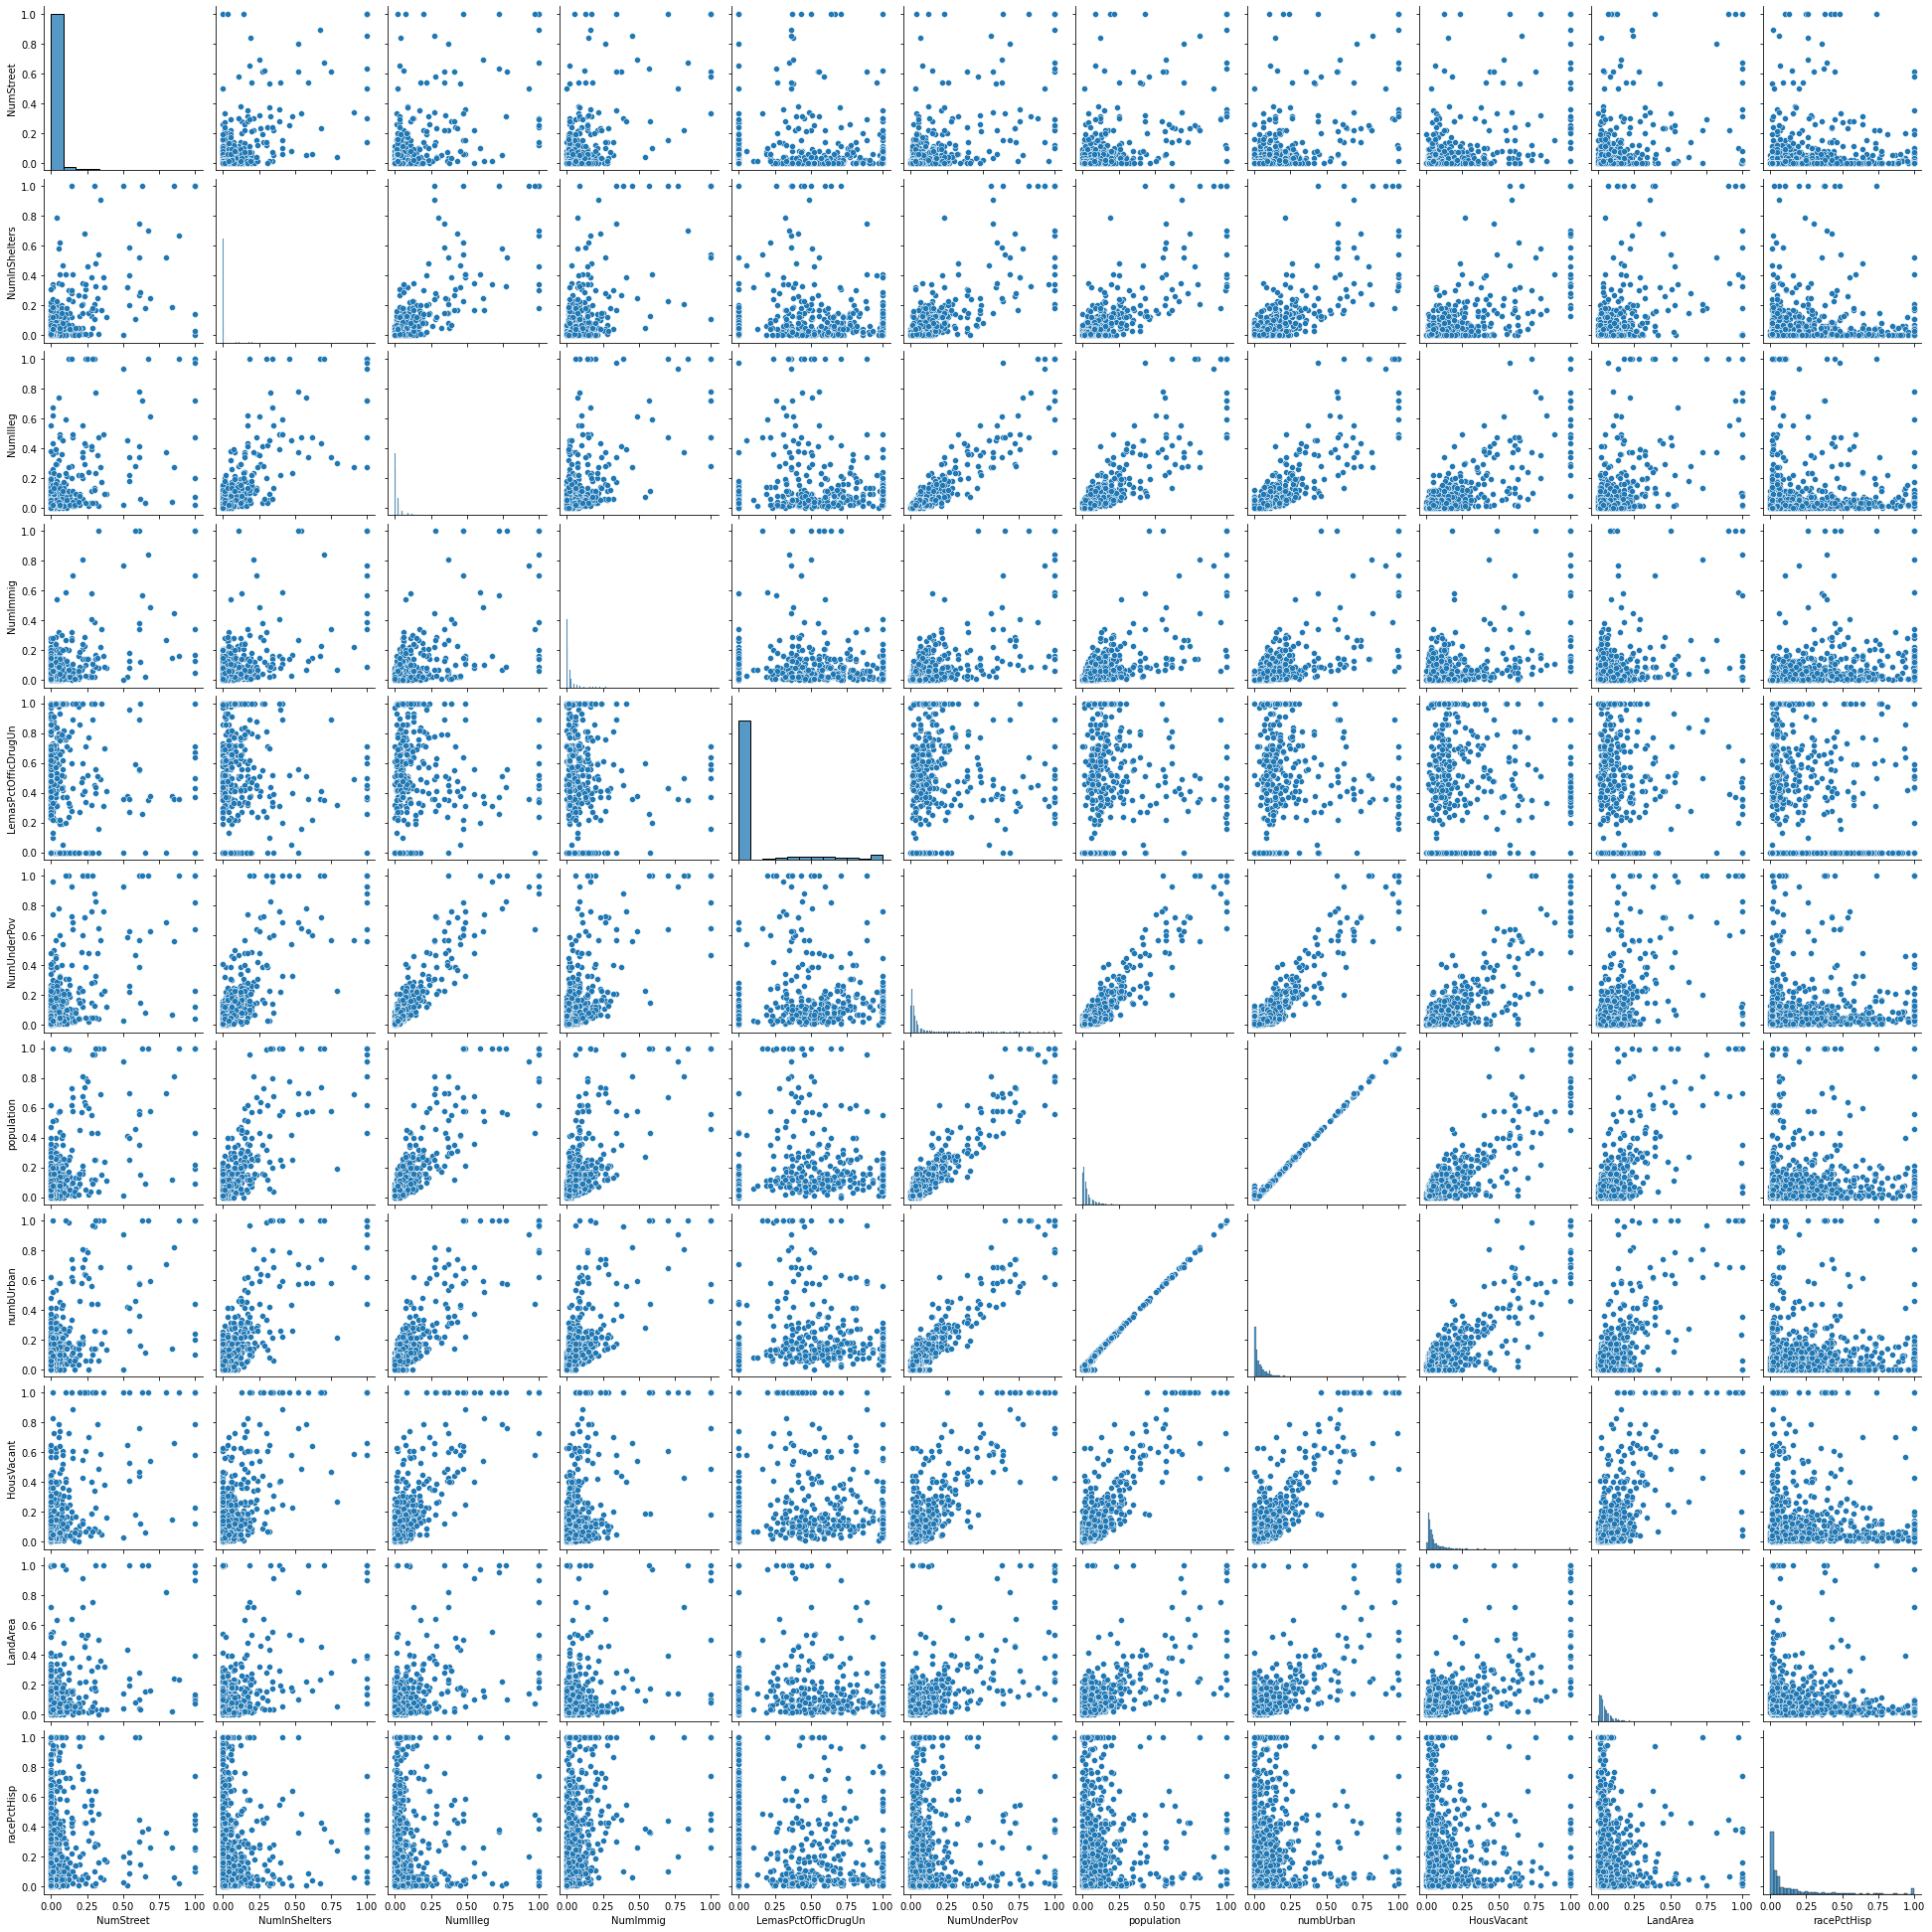

In [40]:
sns.pairplot(new_df)

By the scatter plot, we can see there is  a positive linear association between features numbUrban and population. There exists many postive relationships between each other.

<AxesSubplot:>

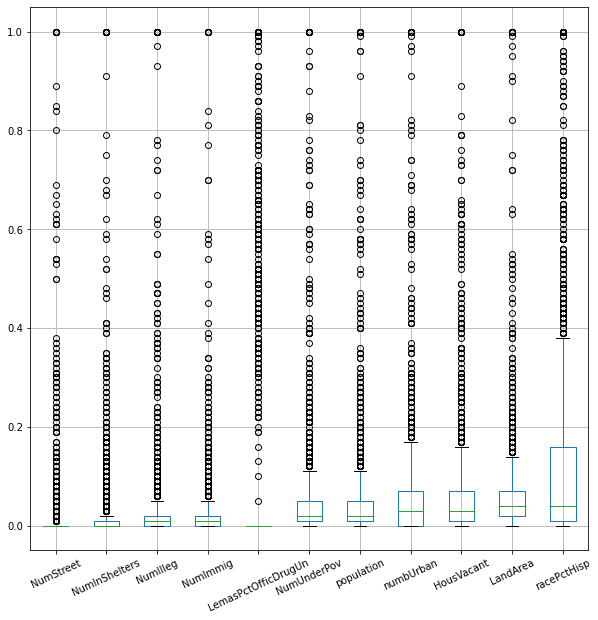

In [41]:
new_df.boxplot(figsize=(10, 10),rot=25)

(f)

In [42]:
lin_train_data = train_data.iloc[:,:122]
lin_train_data_label = train_data.iloc[:,122:]
lin_test_data = test_data.iloc[:,:122]
lin_test_data_label = test_data.iloc[:,122:]
lin_model = LinearRegression()
lin_model.fit(lin_train_data,lin_train_data_label)
pre = lin_model.predict(lin_test_data)
lin_test_error = mean_squared_error(lin_test_data_label,pre)
print('The test error for linear regression is',lin_test_error)

The test error for linear regression is 0.7897255274377554


(g)

In [43]:
alpha = 10**np.linspace(4,-3,100)
ridge_model = RidgeCV(alphas = alpha, cv=10)
ridge_model = ridge_model.fit(lin_train_data, lin_train_data_label) 
ridge_best_alpha = ridge_model.alpha_
print('best alpha is :', ridge_best_alpha)

best alpha is : 2.104904144512022


In [44]:
ridgemodel = Ridge(alpha = ridge_best_alpha)
ridgemodel = ridgemodel.fit(lin_train_data, lin_train_data_label) 
ridge_pre = ridgemodel.predict(lin_test_data).flatten()
test_error = mean_squared_error(lin_test_data_label, ridge_pre)  
print('test error is:', test_error)

test error is: 0.01761724825355317


(h)

In [45]:
alpha = 10**np.linspace(4,-3,100)
lasso_model = LassoCV( alphas= alpha, cv=10)
lasso_model = lasso_model.fit(lin_train_data, np.array(lin_train_data_label).flatten())
lasso_best_alpha = lasso_model.alpha_
print('best alpha is:', lasso_best_alpha)

best alpha is: 0.001


In [46]:
lassomodel = Lasso(alpha = lasso_best_alpha)
lassomodel = lassomodel.fit(lin_train_data, lin_train_data_label) 
lasso_pre = lassomodel.predict(lin_test_data).flatten()
test_error = mean_squared_error(lin_test_data_label, lasso_pre)  
print('test error is:', test_error)

test error is: 0.01754528781156862


In [47]:
features = test_data.columns
slelected_feature = []
lasso_coef = lassomodel.coef_
for i in range(len(lassomodel.coef_)):
    if lasso_coef[i] != 0:
        slelected_feature.append(features[i])

In [48]:
slelected_feature

['racepctblack',
 'racePctWhite',
 'agePct12t29',
 'pctUrban',
 'pctWPubAsst',
 'AsianPerCap',
 'MalePctDivorce',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctWorkMom',
 'PctIlleg',
 'PctRecImmig10',
 'PctPersDenseHous',
 'HousVacant',
 'PctHousOccup',
 'PctVacantBoarded',
 'MedRentPctHousInc',
 'MedOwnCostPctIncNoMtg',
 'NumStreet',
 'PctForeignBorn',
 'PctSameCity85',
 'LemasGangUnitDeploy',
 'LemasPctOfficDrugUn']

Standardized Features

In [49]:
scale_data = pd.DataFrame(scale(commu_data))
scale_train_data = scale_data.iloc[:1495,]
scale_test_data = scale_data.iloc[1495:,]
scale_lin_train_data = scale_train_data.iloc[:,:122]
scale_lin_train_data_label = scale_train_data.iloc[:,122:]
scale_lin_test_data = scale_test_data.iloc[:,:122]
scale_lin_test_data_label = scale_test_data.iloc[:,122:]

In [50]:
alpha = 10**np.linspace(4,-3,100)
lasso_model = LassoCV( alphas= alpha, cv=10)
lasso_model = lasso_model.fit(scale_lin_train_data, np.array(lin_train_data_label).flatten())
lasso_best_alpha = lasso_model.alpha_
print('best alpha is:', lasso_best_alpha)

best alpha is: 0.001


In [51]:
sacle_lassomodel = Lasso(alpha = lasso_best_alpha)
sacle_lassomodel = sacle_lassomodel.fit(scale_lin_train_data, scale_lin_train_data_label) 
sacle_lasso_pre = sacle_lassomodel.predict(scale_lin_test_data).flatten()
test_error = mean_squared_error(scale_lin_test_data_label, sacle_lasso_pre)  
print('test error is:', test_error)

test error is: 0.3293684036188889


In [52]:
features = test_data.columns
slelected_feature = []
lasso_coef = sacle_lassomodel.coef_
for i in range(len(sacle_lassomodel.coef_)):
    if lasso_coef[i] != 0:
        slelected_feature.append(features[i])

In [53]:
slelected_feature

['population',
 'racepctblack',
 'racePctAsian',
 'racePctHisp',
 'agePct12t21',
 'agePct12t29',
 'agePct65up',
 'pctUrban',
 'pctWWage',
 'pctWFarmSelf',
 'pctWInvInc',
 'pctWSocSec',
 'pctWPubAsst',
 'pctWRetire',
 'medFamInc',
 'whitePerCap',
 'blackPerCap',
 'indianPerCap',
 'AsianPerCap',
 'OtherPerCap',
 'HispPerCap',
 'PctPopUnderPov',
 'PctLess9thGrade',
 'PctBSorMore',
 'PctUnemployed',
 'PctEmploy',
 'PctEmplManu',
 'PctOccupManu',
 'PctOccupMgmtProf',
 'MalePctDivorce',
 'MalePctNevMarr',
 'FemalePctDiv',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctWorkMomYoungKids',
 'PctWorkMom',
 'NumIlleg',
 'PctIlleg',
 'NumImmig',
 'PctImmigRec10',
 'PctRecImmig10',
 'PctSpeakEnglOnly',
 'PctNotSpeakEnglWell',
 'PctLargHouseOccup',
 'PersPerOccupHous',
 'PersPerOwnOccHous',
 'PersPerRentOccHous',
 'PctPersOwnOccup',
 'PctPersDenseHous',
 'PctHousLess3BR',
 'MedNumBR',
 'HousVacant',
 'PctHousOccup',
 'PctVacantBoarded',
 'PctVacMore6Mos',
 'MedYrHousBuilt',
 'PctHousNoPho

we find out that after normalizeing the data, we get more selected features.

(i)

In [54]:
lin_train_data = train_data.iloc[:,:122]
lin_train_data_label = train_data.iloc[:,122:]
lin_test_data = test_data.iloc[:,:122]
lin_test_data_label = test_data.iloc[:,122:]
test_error = []
for i in range(1,len(commu_data.columns)):
    pca_model = PCA(n_components = i)
    X_PCA = pca_model.fit_transform(scale(lin_train_data))
    kf_model = KFold(n_splits=10)
    error = []
    for x,y in kf_model.split(X_PCA):
        x_train= X_PCA[x.tolist()]
        x_val = X_PCA[y.tolist()]
        y_train = np.array(lin_train_data_label)[x.tolist()]
        y_val = np.array(lin_train_data_label)[y.tolist()]
        lr_model = LinearRegression()
        lr_model = lr_model.fit(x_train,y_train)
        pre = lr_model.predict(x_val)
        mse = mean_squared_error(y_val, pre)
        error.append(mse)
    test_error.append(np.mean(error))

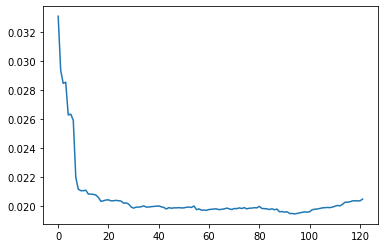

In [55]:
plt.plot(test_error)

In [56]:
min(test_error)

0.019446295467420063

In [57]:
x = 0
for i in (test_error):
    x = x+1
    if i == min(test_error):
        print(i,x)

0.019446295467420063 95


M is 95

In [58]:
pca = PCA(n_components = 95)
train = pca.fit_transform(scale(lin_train_data))
test = pca.fit_transform(scale(lin_test_data))
Y_train = np.array(lin_train_data_label)
Y_test = np.array(lin_test_data_label)
model = LinearRegression()
model = model.fit(train,Y_train)
pre = model.predict(test)
error = mean_squared_error(Y_test, pre)
print("Test set error with M = 95  ",error)

Test set error with M = 95   0.04642399225523434


(j)

In [59]:
alpha = 10**np.linspace(4,-3,100)
xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror')
xgb_parameters = {'reg_alpha': alpha}
val = GridSearchCV(xgb_model, xgb_parameters, cv = 10)
val = val.fit(lin_train_data.values, lin_train_data_label.values.flatten())
best_a = val.best_params_['reg_alpha']
print('best a is :', best_a)

best a is : 2.104904144512022


In [60]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', reg_alpha = best_a)
xgb_model = xgb_model.fit(lin_train_data, lin_train_data_label)
pre = xgb_model.predict(lin_test_data)
error = mean_squared_error(lin_test_data_label, pre)
print('error is:', error)

error is: 0.017843397371995938
